# Nonlinear Relationships

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.14.3
0.23.0
3.6.5 | packaged by conda-forge | (default, Apr  6 2018, 13:44:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
0.19.2


In [3]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = boston_data.target

## Brief Introduction to Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
X = df[['LSTAT']].values

In [8]:
tree = DecisionTreeRegressor(max_depth=5)

In [9]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
sort_idx = X.flatten().argsort()

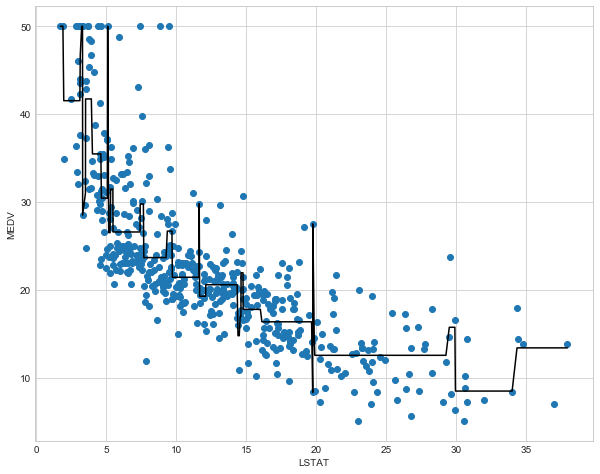

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

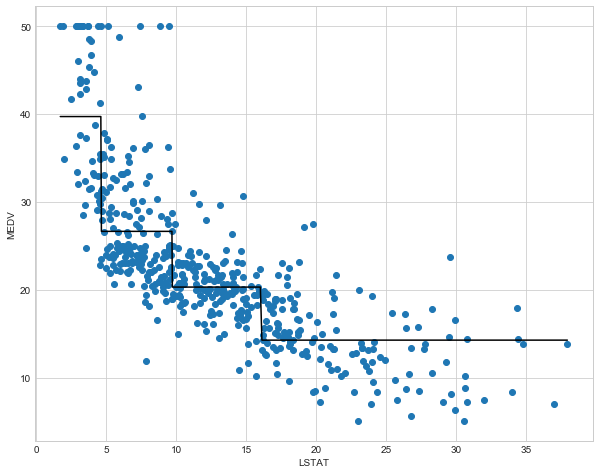

In [12]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# Brief Introduction to Random Forest

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df.values
#y = df['MEDV'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [18]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
y_train_pred = forest.predict(X_train)

In [20]:
y_test_pred = forest.predict(X_test)

In [21]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8712, test: 9.3994


In [22]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9787, test: 0.8739


# Brief Introduction to AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostRegressor

In [24]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [25]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [26]:
y_train_pred = ada.predict(X_train)

In [27]:
y_test_pred = ada.predict(X_test)

In [28]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 4.4864, test: 13.2099


In [29]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9490, test: 0.8227


***

# Revisiting Feature Importance

13 features.

Are they all equally important?

Which features are more important?

Can scikit-learn help us with this?

## According to AdaBoost

In [30]:
ada.feature_importances_

array([0.03380489, 0.00342185, 0.00904711, 0.00108256, 0.04181682,
       0.24254942, 0.00874274, 0.12358089, 0.01733797, 0.02265699,
       0.0392171 , 0.02421406, 0.43252762])

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [33]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.432528
RM,0.242549
DIS,0.123581
NOX,0.041817
PTRATIO,0.039217
CRIM,0.033805
B,0.024214
TAX,0.022657
RAD,0.017338
INDUS,0.009047


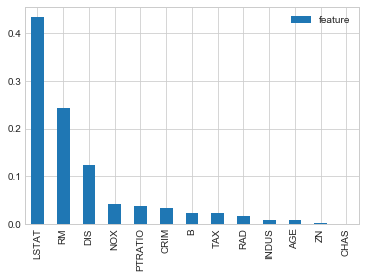

In [34]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***

## According to Random Forest

In [35]:
forest.feature_importances_

array([0.03036163, 0.001677  , 0.0068441 , 0.0012651 , 0.01535587,
       0.40401012, 0.01400592, 0.06316796, 0.00461262, 0.01215806,
       0.0186434 , 0.01276181, 0.41513641])

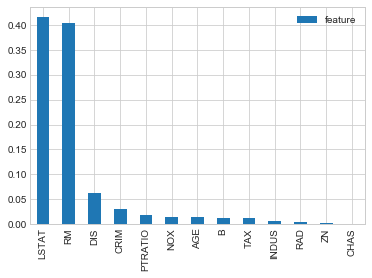

In [36]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***

# Exercise

In [37]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [38]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 15.3680, test: 16.9282


In [39]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.8252, test: 0.7728


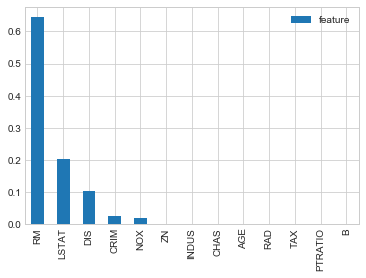

In [40]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***